# CNN :  Google Bert Augmented Resturant data

In [ ]:
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=eb74e5cd5284363e1739e26bf635dbed3aabf9a5bd3d08968627ceaf8899e8a6
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import pandas as pd
import re
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Flatten
from sklearn.preprocessing import LabelEncoder
# from keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,Embedding , BatchNormalization
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
import xgboost as xgb 
import sklearn.metrics as metrics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Loading preprocessing class

In [ ]:
#https://stackoverflow.com/questions/62117483/import-module-in-google-colab-from-google-drive-python
sys.path.append('/content/gdrive/MyDrive/CS--2/') # for easy to access file that this code need, I created 'CS--2' folder under google driver
#import module_1_xml_to_df
#from module_1_xml_to_df import convert_xml_to_DataFrame
from module_2_preprocessing import Data_Preprocessing

## 1. Loading the data

In [ ]:
restaurant_data = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant_bert.csv")

In [ ]:
restaurant_data.shape

(6088, 5)

In [ ]:
restaurant_data.head()

,id,text,aspect_term,aspect_category,polarity
0,141.0,this dish is my favorite and i always get it w...,dish,food,positive
1,NaN,i think that it actually is absolutely brillia...,NaN,anecdotes/miscellaneous,positive
2,91.0,i will be going back and heartily recommend it!,NaN,anecdotes/miscellaneous,positive
3,1094.0,the food is amazing!!!!,food,food,positive
4,946.0,"we only ordered desserts and drinks, but no re...",drinks,service,negative


In [ ]:
restaurant_data.groupby('aspect_category').size().sort_values(ascending=False)

aspect_category
anecdotes/miscellaneous    2091
food                       1692
service                     952
ambience                    784
price                       569
dtype: int64

In [ ]:
catagories = restaurant_data['aspect_category'].unique()
catagories , len(catagories)

(array(['food', 'anecdotes/miscellaneous', 'service', 'ambience', 'price'],
       dtype=object), 5)

## 2. Aspect Based Sentiment Analysis

In [ ]:
X = restaurant_data['text']
Y = restaurant_data['aspect_category']

### 2.1. Splitting the data 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
dp = Data_Preprocessing()

In [ ]:
X_train_review = dp.preprocess_text(X_train)

100%|██████████| 4870/4870 [00:04<00:00, 998.20it/s] 


In [ ]:
X_test_review = dp.preprocess_text(X_test)

100%|██████████| 1218/1218 [00:00<00:00, 1702.86it/s]


In [ ]:
X_train_review[0:5]

['while otherwise this place has great service and lower prices and nice very friendly social atmosphere',
 'was now quite pretty fucking just bloody much full back now anyway after drinking our fabulous fondue cafe appetizer',
 'and the burger place was not picking hard hard enough find but was really kind packed soon former boyfriend and got our food the line reached the door',
 'visited orsay during restaurant week and tried their menu',
 'the french ambience completely authentic french and slightly relaxing and have always happily received attentive and always prompt service']

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_train_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(X_train_review))
X_test_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(X_test_review))

In [ ]:
X_train_tokenized.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5960,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tokenizer.get_config()['word_index']

'{"the": 1, "and": 2, "a": 3, "to": 4, "is": 5, "i": 6, "for": 7, "was": 8, "of": 9, "in": 10, "it": 11, "food": 12, "but": 13, "this": 14, "you": 15, "with": 16, "we": 17, "not": 18, "that": 19, "have": 20, "place": 21, "on": 22, "good": 23, "great": 24, "all": 25, "so": 26, "my": 27, "are": 28, "very": 29, "at": 30, "service": 31, "just": 32, "they": 33, "had": 34, "were": 35, "there": 36, "as": 37, "be": 38, "here": 39, "restaurant": 40, "even": 41, "if": 42, "go": 43, "really": 44, "out": 45, "like": 46, "been": 47, "only": 48, "from": 49, "or": 50, "also": 51, "one": 52, "always": 53, "our": 54, "more": 55, "by": 56, "back": 57, "would": 58, "best": 59, "your": 60, "an": 61, "will": 62, "too": 63, "get": 64, "now": 65, "actually": 66, "well": 67, "up": 68, "never": 69, "their": 70, "me": 71, "about": 72, "ever": 73, "little": 74, "delicious": 75, "what": 76, "has": 77, "still": 78, "nice": 79, "pizza": 80, "when": 81, "dinner": 82, "some": 83, "menu": 84, "can": 85, "no": 86, "ove

In [ ]:
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(y_train)
encoded_y_train = to_categorical(integer_category)

integer_category = label_encoder.fit_transform(y_test)
encoded_y_test = to_categorical(integer_category)

In [ ]:
integer_category

array([3, 3, 1, ..., 3, 1, 1])

In [ ]:
encoded_y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

### 2.2 CNN Aspect Based model

In [ ]:
acbsa_model = Sequential()
acbsa_model.add(Dense(512, input_shape=(6000,), activation='relu'))
#acbsa_model.add((BatchNormalization()))
acbsa_model.add((Dense(256, activation='relu')))
acbsa_model.add((Dropout(0.3)))
acbsa_model.add((Dense(128, activation='relu')))
#acbsa_model.add((Dropout(0.1)))
#acbsa_model.add((Dense(64, activation='relu')))
acbsa_model.add(Dense(5, activation='softmax'))
#compile model
acbsa_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
acbsa_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3072512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 3,237,381
Trainable params: 3,237,381
Non-trainable params: 0
_________________________________________________________________


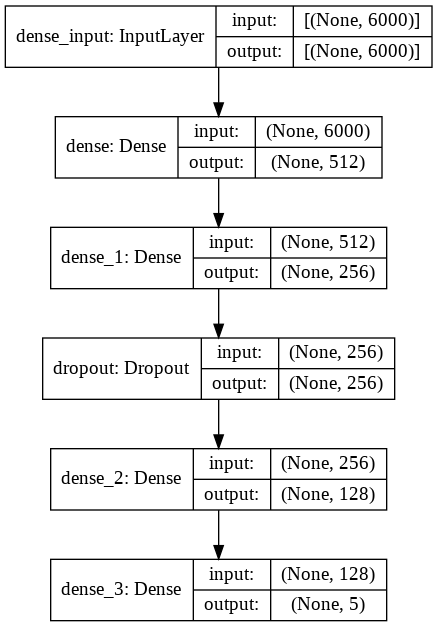

In [ ]:
plot_model(acbsa_model, 'model_1.png',show_shapes=True)

In [ ]:
#fit aspect classifier
history = acbsa_model.fit(X_train_tokenized , encoded_y_train , validation_data=(X_test_tokenized ,encoded_y_test) , epochs= 5, verbose=1)

Epoch 1/5
153/153 [==============================] - 4s 23ms/step - loss: 0.8916 - accuracy: 0.6832 - val_loss: 0.4092 - val_accuracy: 0.8662
Epoch 2/5
153/153 [==============================] - 3s 22ms/step - loss: 0.1637 - accuracy: 0.9507 - val_loss: 0.3419 - val_accuracy: 0.8941
Epoch 3/5
153/153 [==============================] - 3s 21ms/step - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.3997 - val_accuracy: 0.9089
Epoch 4/5
153/153 [==============================] - 3s 21ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.3934 - val_accuracy: 0.9171
Epoch 5/5
153/153 [==============================] - 3s 21ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4288 - val_accuracy: 0.9146


In [ ]:
np.argmax((acbsa_model.predict(X_test_tokenized)>0.5).astype("int32"), axis = 1)

array([1, 1, 1, ..., 1, 2, 2])

In [ ]:
# predicted_cat = label_encoder.inverse_transform(acbsa_model.predict_classes(X_test_tokenized))
predicted_cat = label_encoder.inverse_transform(np.argmax((acbsa_model.predict(X_test_tokenized)>0.5).astype("int32"), axis = 1))
#print(new_polarity)

In [ ]:
predicted_cat[0:10]

array(['anecdotes/miscellaneous', 'anecdotes/miscellaneous',
       'anecdotes/miscellaneous', 'anecdotes/miscellaneous', 'food',
       'food', 'price', 'food', 'anecdotes/miscellaneous', 'food'],
      dtype=object)

### 2.3 Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_cat ,target_names=catagories))

                         precision    recall  f1-score   support

                   food       0.93      0.85      0.89       164
anecdotes/miscellaneous       0.91      0.95      0.93       400
                service       0.93      0.92      0.92       355
               ambience       0.95      0.89      0.92       113
                  price       0.86      0.90      0.88       186

               accuracy                           0.91      1218
              macro avg       0.92      0.90      0.91      1218
           weighted avg       0.91      0.91      0.91      1218



### Observation : 
This is the classification report of aspect category based sentiment model showing the precision, recall, f1_score and support values for all 5 unique catagories with accuracy 91 percent 

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.xlabel('epoch')
  plt.figure()

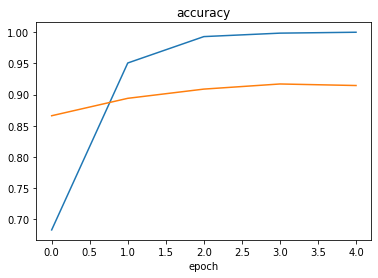

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_accuracy(history)

### 2.4.  Confusion matrix Representation

In [ ]:
# code borrowed from Microsoft Malware Detection Assignment
def plot_confusion_matrix(test_y, predict_y ,labels):
    C = confusion_matrix(test_y, predict_y)      # calculation of confusion matrix 
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y))    # number of misclassified points while predicting y
 
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = labels                 
    cmap=sns.light_palette("purple")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Number of misclassified points  0.08620689655172414
-------------------------------------------------- Confusion matrix --------------------------------------------------


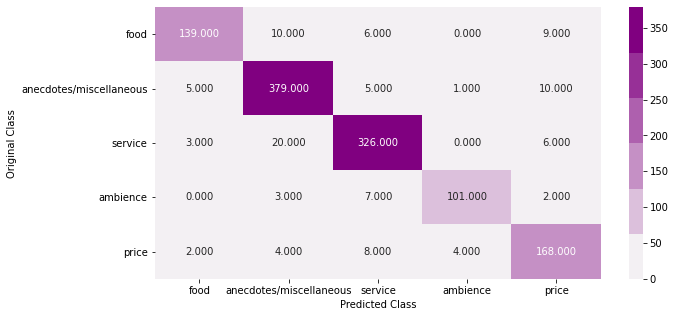

-------------------------------------------------- Precision matrix --------------------------------------------------


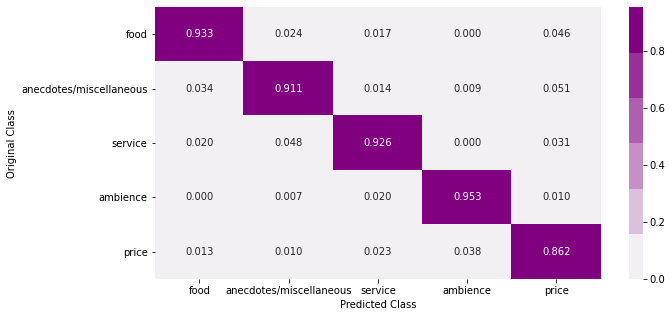

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


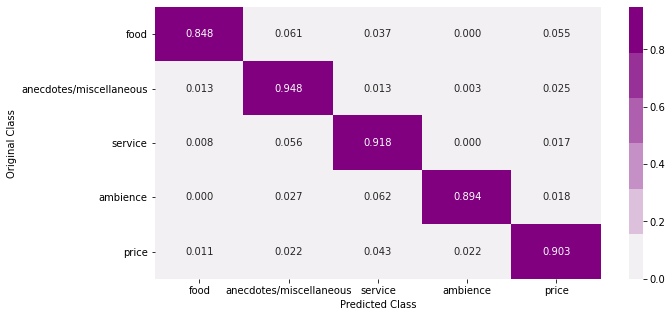

Sum of rows in precision matrix [1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test,  predicted_cat, catagories)

## 3. Polarity Based sentiment model

In [ ]:
X = restaurant_data['text']
Y = restaurant_data['polarity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


In [ ]:
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(y_train)
encoded_y_train = to_categorical(integer_category)

integer_category = label_encoder.fit_transform(y_test)
encoded_y_test = to_categorical(integer_category)

### 3.1 CNN sentiment model

In [ ]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add((Dense(256, activation='relu')))
sentiment_model.add((Dropout(0.3)))
sentiment_model.add((Dense(128, activation='relu')))
sentiment_model.add(Dense(4, activation='softmax'))
sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
sentiment_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               3072512   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 516       
Total params: 3,237,252
Trainable params: 3,237,252
Non-trainable params: 0
_________________________________________________________________


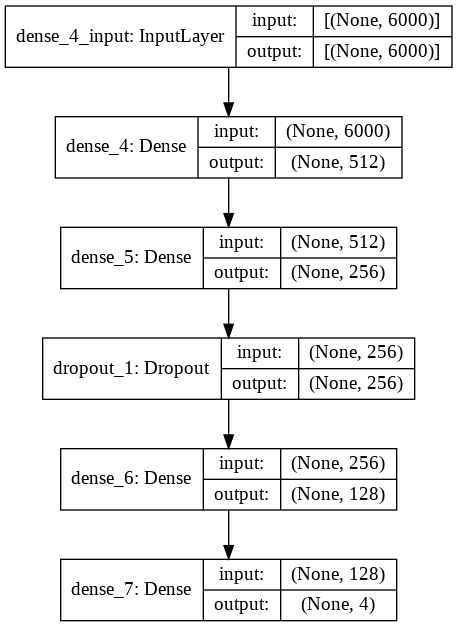

In [ ]:
plot_model(sentiment_model, 'model_2.png',show_shapes=True)

In [ ]:
#fit aspect classifier
history = sentiment_model.fit(X_train_tokenized , encoded_y_train , validation_data=(X_test_tokenized ,encoded_y_test) , epochs=6, verbose=1)

Epoch 1/6
153/153 [==============================] - 4s 23ms/step - loss: 0.8234 - accuracy: 0.6754 - val_loss: 0.4527 - val_accuracy: 0.8530
Epoch 2/6
153/153 [==============================] - 3s 21ms/step - loss: 0.2133 - accuracy: 0.9269 - val_loss: 0.3483 - val_accuracy: 0.8859
Epoch 3/6
153/153 [==============================] - 3s 21ms/step - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.4104 - val_accuracy: 0.9031
Epoch 4/6
153/153 [==============================] - 3s 21ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.4504 - val_accuracy: 0.9023
Epoch 5/6
153/153 [==============================] - 3s 21ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.4833 - val_accuracy: 0.9048
Epoch 6/6
153/153 [==============================] - 3s 21ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.5033 - val_accuracy: 0.9031


In [ ]:
np.argmax((sentiment_model.predict(X_test_tokenized)>0.5).astype("int32"), axis = 1)

array([3, 3, 1, ..., 3, 1, 2])

In [ ]:
# np.argmax((sentiment_model.predict(X_test_tokenized)>0.5).astype("int32"), axis = 1)
predicted_polarity = label_encoder.inverse_transform(np.argmax((sentiment_model.predict(X_test_tokenized)>0.5).astype("int32"), axis = 1))
# predicted_polarity = label_encoder.inverse_transform(sentiment_model.predict_classes(X_test_tokenized))
#print(new_polarity)

In [ ]:
predicted_polarity[0:10]

array(['positive', 'positive', 'negative', 'neutral', 'positive',
       'positive', 'negative', 'positive', 'positive', 'conflict'],
      dtype=object)

In [ ]:
polarity = restaurant_data["polarity"].unique()
polarity

array(['positive', 'negative', 'conflict', 'neutral'], dtype=object)

### 3.2 Classification repoort

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_polarity ,target_names= polarity))

              precision    recall  f1-score   support

    positive       0.75      0.73      0.74        55
    negative       0.89      0.86      0.87       273
    conflict       0.89      0.83      0.86       177
     neutral       0.92      0.95      0.93       713

    accuracy                           0.90      1218
   macro avg       0.86      0.84      0.85      1218
weighted avg       0.90      0.90      0.90      1218



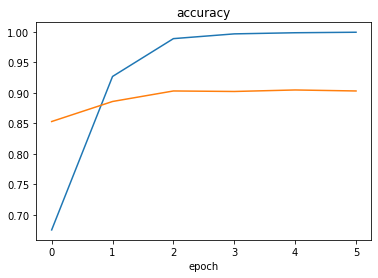

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_accuracy(history)

### 3.3 Confusion matrix representation

Number of misclassified points  0.09852216748768473
-------------------------------------------------- Confusion matrix --------------------------------------------------


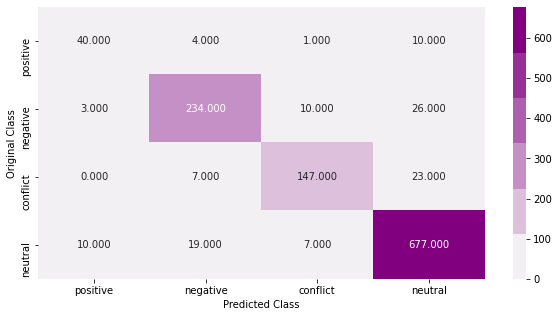

-------------------------------------------------- Precision matrix --------------------------------------------------


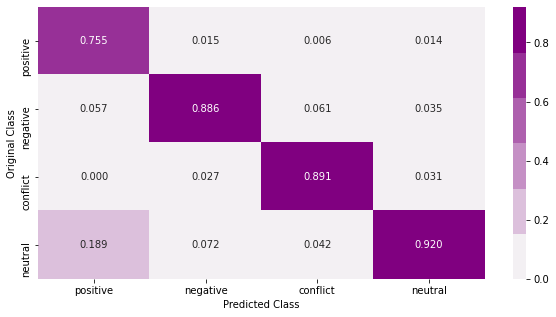

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


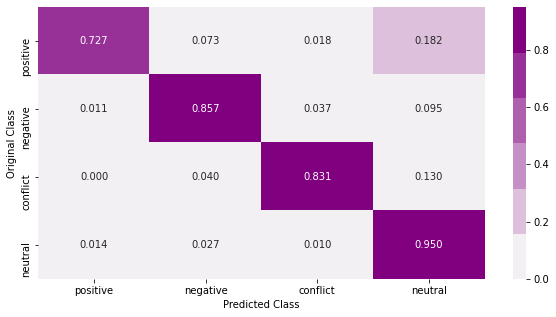

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test,  predicted_polarity, polarity)

## 4. creating a resultant dataframe

In [ ]:
def create_result_dataframe(pred_1,pred_2):
  # Calling DataFrame constructor on predicted outputs
  resultant_df = pd.DataFrame(list(zip(pred_1,pred_2)), columns = ["predicted_catagories" , "predicted_polarity"])
  result  = pd.crosstab(resultant_df.predicted_catagories,resultant_df.predicted_polarity ,margins = True , margins_name = "Total")
  result["Ranking"] = ( result.Total/resultant_df.shape[0]) * 5.0 
  result["Negative in %"] = (result.negative/result.Total) * 100
  result["Neutral in %"] = (result.neutral/result.Total) * 100
  result["Positive in %"] = (result.positive/result.Total) * 100
  result["conflict in %"] = (result.conflict/result.Total) * 100
  del result["negative"]
  del result["neutral"]
  del result["positive"]
  del result["Total"]
  del result["conflict"]

  return result


In [ ]:
result = create_result_dataframe(predicted_cat,predicted_polarity)

In [ ]:
result

predicted_polarity,Ranking,Negative in %,Neutral in %,Positive in %,conflict in %
predicted_catagories,,,,,
ambience,0.611658,23.489933,6.040268,62.416107,8.053691
anecdotes/miscellaneous,1.707718,15.625000,27.884615,53.365385,3.125000
food,1.444992,14.488636,8.806818,73.295455,3.409091
price,0.435140,35.849057,2.830189,53.773585,7.547170
service,0.800493,38.461538,3.076923,54.358974,4.102564
Total,5.000000,21.674877,13.546798,60.426929,4.351396


### Observation :
   Above result shows that the Ranking and all Polarities in percentages for all aspect catagories from which we can see that anecdotes/miscellaneous have the highest ranking of 1.79 . and food catagory have highest positive polarity